# Computational curve fitting and calculating the ideal parameters of a function

## Introduction

In this report I will be exploring and evaluating the use of computing in calculating the ieal parameters in order to produce the best curve fit for a function. To do this we will be considering data on magnetic ordering and neutron diffraction taken directly from ISIS, the UK's national neutron source. Magnetic ordering refers to the alignment of the magnetic moments in the material. Our data is anchored around antiferromagnetism which is a state of magnetic ordering where alterante magnetic moments oppose each other making the overall magnetic moment null [[1](https://www.britannica.com/science/antiferromagnetism)]. Antiferromagnetism will cause the crystallographic unit cell size of a material to increase causing characterisitc peaks in neutron diffraction paterns. The material the data was collected from is a manganese(II) compound, methylammonium manganese(II) formate (CH<sub>3</sub>NH<sub>3</sub>Mn(HCO<sub>2</sub>)<sub>3</sub>) [[2](http://dx.doi.org/10.1039/C6TC03992H)]. The function we will be fitting is the magnetisation of the material as a function of temperature $M(T)$, the parameters of which are the amplitude of the magnetic signal ($A$), the magnetic transition temperature ($T_0$), the *critical exponent* ($\beta$), and a constant background ($B$). Magnetisation is classically defined as the density of magnetic moments in a magnetic material [6–9, 3], the SI units of magnetisation are Amperes per metre: $Am^{-1}$[[4](https://www.lakeshore.com/Documents/Units%20for%20Magnetic%20Properties.PDF)]. To measure the magnetisation of an antiferromagnetic material we apply a magnetic field to the material to induce a magnetic moment. The function is defined as:

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$

 

## Methods

In order to model the function we must first load and import the data [5]. The data provided is split into two columns, the first listing values for diffraction spacing and the second listing values for the corresponding diffraction intensity. Using the following code, we will load and plot the data:

<IPython.core.display.Javascript object>


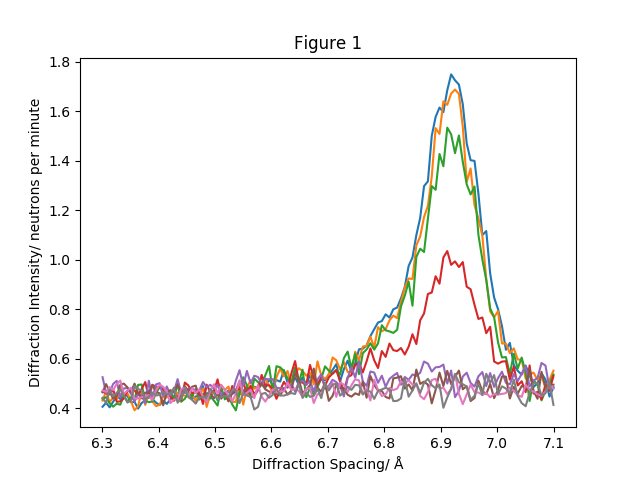

In [3]:
% matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
# This is setup code used to ignore warnings for presentation purposes
import numpy as np
import pylab as plt
# This is setup code to allow us to call functions from the numpy and pylab modules

data1 = np.loadtxt('project2_data\data_02.0K.txt') 
# Using the loadtxt function from the numpy module to extract the data and set it as an N x 2 array where N is the number of rows
plt.plot(data1[:,0],data1[:,1])
# Plotting the data, [:,0] = entire column of first array element, [:,1] = entire column of second array element 

# repetiton of load and plot process for every data set 
data2 = np.loadtxt('project2_data\data_03.0K.txt')
plt.plot(data2[:,0],data2[:,1])

data3 = np.loadtxt('project2_data\data_04.0K.txt')
plt.plot(data3[:,0],data3[:,1])

data4 = np.loadtxt('project2_data\data_06.5K.txt')
plt.plot(data4[:,0],data4[:,1])

data5 = np.loadtxt('project2_data\data_07.5K.txt')
plt.plot(data5[:,0],data5[:,1])

data6 = np.loadtxt('project2_data\data_10.0K.txt')
plt.plot(data6[:,0],data6[:,1])

data7 = np.loadtxt('project2_data\data_15.0K.txt')
plt.plot(data7[:,0],data7[:,1])

data8 = np.loadtxt('project2_data\data_30.0K.txt')
plt.plot(data8[:,0],data8[:,1])

plt.ylabel('Diffraction Intensity/ neutrons per minute') # y axis label
plt.xlabel('Diffraction Spacing/ Å') # x axis label         
plt.title('Figure 1')
plt.show() # displays graph

Whilst this is not the most efficient method of loading and plotting the data, I chose this method so I could assign each data set it's own variable to be called later. To find values for magnetisation, we can integrate the diffraction intensity over the diffraction spacing. We integrate the data using the trapz function from the numpy module [6], which uses the trapezoid algorithm to aproximate integrals. This can done with the following code: 

<IPython.core.display.Javascript object>


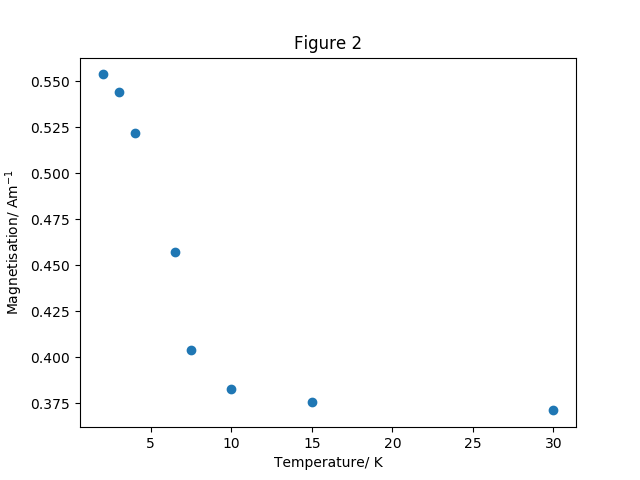

In [4]:
% matplotlib notebook

imdi = [] # Empty list to later be appended with magnetisation values
data = [data1, data2, data3, data4, data5, data6, data7, data8] # list of the data sets for more efficient integration loop 

for i in range(len(data)): # Loop designed to integrate diffraction intensity values and append them to the empty imdi list
    m = np.trapz((data[i])[:,1], (data[i])[:,0]) # Trapz function from the numpy module used to integrate our values
    imdi.append(m)

temps = [2.0, 3.0, 4.0, 6.5, 7.5, 10.0, 15.0, 30.0] # List of temperatures corresponding to the data sets
plt.plot(temps, imdi, 'o') # plotting the magnetisation against temperature

plt.xlabel('Temperature/ K')
plt.ylabel('Magnetisation/ Am$^{-1}$')
plt.title('Figure 2')

plt.show()


Now that we've plotted our data, the next step is to attempt to curve fit the data using the model for our magnetisation function. We'll first provide a curve fit by hand. To do this computationally, we plot a large amount of points calculated by applying our function for magnetisation to a range of temperature values between $0$ and $30$ Kelvin. Note that the tempertaures are very low as antiferromagnetism only occurs at very low temperatures [[1](https://www.britannica.com/science/antiferromagnetism)]. As an inital guess for the parameters of the magentisation function, I will choose: $A = 0.07$, $T_0 = 8.0K$, $\beta = 0.5$, $B = 0.37$. These parameters were gained mostly through trial and error and extrapolations from the data. To plot this guess, we will use the following code: 

<IPython.core.display.Javascript object>


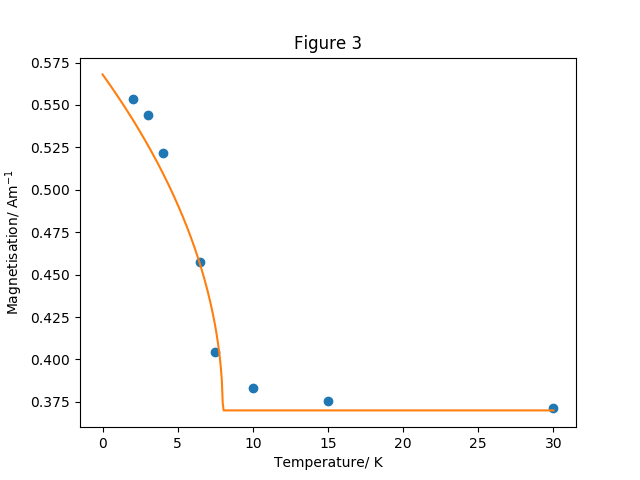

In [5]:
% matplotlib notebook

def M(T, A, T0, beta, B): return np.where(T < T0, (A*((T0-T)**beta))+ B, B) 
# defining our function M(T) using the where function from numpy to give different value based on if T < T0 is true or not

t = np.linspace(0, 30, 500)
# defining our range of temperature values between 0 K and 30 K
m = M(t, 0.07, 8, 0.5, 0.37)
# fitting the data "by hand" using an initial guess for our parameters

plt.plot(temps, imdi, 'o')
# Plotting the data values we're trying to fit
plt.plot(t, m)
# Plotting our fit "by hand"
plt.xlabel('Temperature/ K')
plt.ylabel('Magnetisation/ Am$^{-1}$')
plt.title('Figure 3')
plt.show()
        

Finally, as our initial guess for a curve fit is fairly accurate, we can use the curve_fit function from the module scipy.optimize [7] to optimise our initial parameter guesses to provide the best possible curve fit from our initial guess. The function will return our optimised parameters and a covariance array with we will diagonolise and square root to calculate the uncertainties of those optimised parameters.

## Results and Discussion

Using the curve_fit function we'll plot the optimum curve fit from our initial guess:

<IPython.core.display.Javascript object>


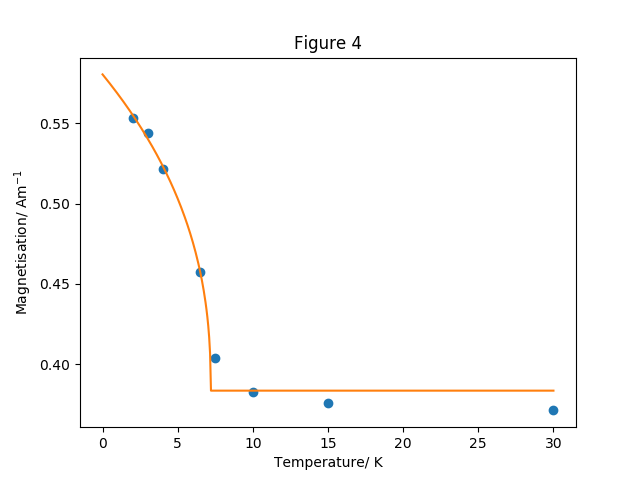

Optimised parameters = [ 0.08589907  7.19883998  0.42068291  0.38349813]
Uncertainties =  [ 0.06199076  1.50858925  0.39181482  0.00639943]


In [6]:
% matplotlib notebook
import scipy.optimize as scio
# Allows us to call functions the scipy.optimize module

plt.plot(temps,imdi, 'o')
#plotting our original magnetisation data set

best_params, covariance = scio.curve_fit(M, temps, imdi, (0.07, 8, 0.5, 0.37))
# Calculates the best parameters the function M and the covariance from an initial guess 
print('Optimised parameters =', best_params)
print('Uncertainties = ', np.sqrt(np.diag(covariance)))
# Prints the optimised parameters and their corresponding uncertainties

plt.plot(t, M(t, best_params[0], best_params[1], best_params[2], best_params[3]))
# Plot of the curve fit calculated from the curve_fit function

plt.xlabel('Temperature/ K')
plt.ylabel('Magnetisation/ Am$^{-1}$')
plt.title('Figure 4')
plt.show()

The curve_fit function provided a much more accurate fit than my curve fit by hand. Hence, computational curve fitting is far more effective than fitting by hand however it's limited in the sense that the curve_fit function requires an accurate initial guess to produce an optimum curve fit. The optimised parameters are $A = 0.08589907 \pm 0.06199076$, $T_0 = 7.19883998 \pm 1.50858925K$, $\beta = 0.42068291 \pm 0.39181482$, $B = 0.38349813 \pm 0.00639943$. To further explore the properties of computational curve fitting, let's consider a different initial guess:

<IPython.core.display.Javascript object>


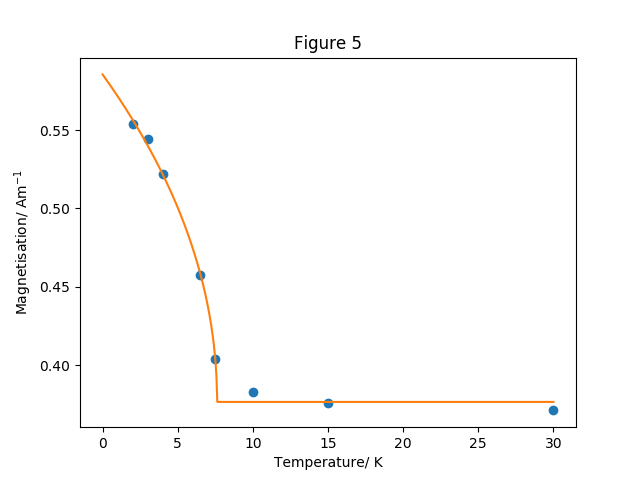

Optimised parameters = [ 0.07750173  7.61870466  0.48834063  0.37659476]
Uncertainties =  [ 0.00665912  0.07118578  0.05049476  0.00279881]


In [70]:
% matplotlib notebook

plt.plot(temps,imdi, 'o')
#plotting our original magnetisation data set

best_params, covariance = scio.curve_fit(M, temps, imdi, (0.09, 10, 0.4, 0.2))
# Calculates the best parameters the function M and the covariance from an initial guess 
print('Optimised parameters =', best_params)
print('Uncertainties = ', np.sqrt(np.diag(covariance)))
# Prints the optimised parameters and their corresponding uncertainties

plt.plot(t, M(t, best_params[0], best_params[1], best_params[2], best_params[3]))
# Plot of the curve fit calculated from the curve_fit function

plt.xlabel('Temperature/ K')
plt.ylabel('Magnetisation/ Am$^{-1}$')
plt.title('Figure 5')
plt.show()

The initial guess values for the parameters a much different to my previous guess and provided a different yet even more plausible fit. From this we can conclude that the computational curve fitting is quite sensitive to the initial guess and even provides different optimised parameters based on it: $A = 0.07750173 \pm 0.00665912$, $T_0 = 7.61870466 \pm 0.07118578K$, $\beta = 0.48834063 \pm 0.05049476$ and $B = 0.37659476 \pm 0.00279881$, which are quite different to the optimised parameters given by my original initial guess and have significantly lower uncertainties. This sensitivity is most likely due to the fact that the curve_fit function makes use of the Levenberg–Marquardt algorithm when given no bounds [7], which is applicable to our case. A significant flaw of this algorithm is the fact that the curve fit produced is better the closer the initial guess is to the optimum curve fit. This affects the algorithm significantly enough to the point where it will produce an incredibly sub-par curve fit if the initial guess is too far away from the optimum parameters. For example:  

<IPython.core.display.Javascript object>


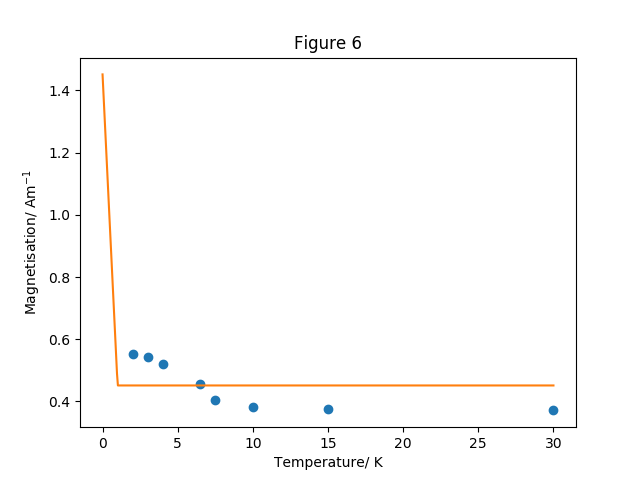

Optimised parameters = [ 1.          1.          1.          0.45136219]
Uncertainties =  [ inf  inf  inf  inf]


In [71]:
% matplotlib notebook

plt.plot(temps,imdi, 'o')
#plotting our original magnetisation data set

best_params, covariance = scio.curve_fit(M, temps, imdi, (1,1,1,1))
# Calculates the best parameters the function M and the covariance from an initial guess 
print('Optimised parameters =', best_params)
print('Uncertainties = ', np.sqrt(np.diag(covariance)))
# Prints the optimised parameters and their corresponding uncertainties

plt.plot(t, M(t, best_params[0], best_params[1], best_params[2], best_params[3]))
# Plot of the curve fit calculated from the curve_fit function

plt.xlabel('Temperature/ K')
plt.ylabel('Magnetisation/ Am$^{-1}$')
plt.title('Figure 6')
plt.show()

The initial guess of all parameters as $1$ doesn't produce much of a curve fit nor are the parameters optomised save for $B$.

Returning to Figure 4, our original optimised curve fit, we notice that the uncertainties in our values are quite large, especially that of $\beta$. We also notice that the data point for $10$ K does not follow the optimised curve fit. To mitigate this we'll remove this point of data and then recalculate the curve fit:

<IPython.core.display.Javascript object>


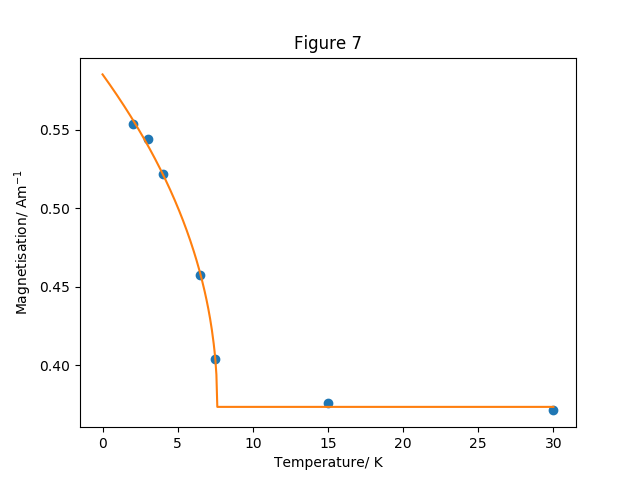

Optimised parameters = [ 0.08002583  7.63378375  0.47895842  0.37343251]
Uncertainties =  [ 0.00488719  0.05335903  0.03503071  0.00237634]


In [72]:
% matplotlib notebook

x = [2.0, 3.0, 4.0, 6.5, 7.5, 15.0, 30.0] # Removed the 10K data point
data_p = [data1, data2, data3, data4, data5, data7, data8] # Removed data6, the data corresponding to 10K
y = [] # Empty list for new integrated values

for i in range(len(data_p)): # Loop designed to integrate diffraction intensity values and append them to the empty list
    m = np.trapz((data_p[i])[:,1], (data_p[i])[:,0]) # Trapz function from the numpy module used to integrate our values
    y.append(m)
    
plt.plot(x, y, 'o') # plot of the data, minus the 10K data point

best_params, covariance = scio.curve_fit(M, x, y, (0.07, 8, 0.5, 0.37))
# Calculates the best parameters the function M and the covariance from an initial guess 
print('Optimised parameters =', best_params)
print('Uncertainties = ', np.sqrt(np.diag(covariance)))
# Prints the optimised parameters and their corresponding uncertainties

plt.plot(t, M(t, best_params[0], best_params[1], best_params[2], best_params[3]))
# Plot of the curve fit calculated from the curve_fit function

plt.xlabel('Temperature/ K')
plt.ylabel('Magnetisation/ Am$^{-1}$')
plt.title('Figure 7')
plt.show()

As shown, the uncertainties were massively reduced and the parameters were optimised slightly differently: $A = 0.08002583 \pm  0.00488719$, $T_0 = 7.63378375 \pm 0.05335903 K$ , $\beta = 0.47895842 \pm 0.03503071$ and $B = 0.37343251 \pm 0.00237634$. The most notable decrease in uncertainty is in the uncertainty of $\beta$ which was $0.39181482$ and then reduced to $0.03503071$. This decrease in uncertainty could be attributed to the removal of noise if we were to consider the $10$ K data point as such. This shows that noise in the data mostly has an effect on the uncertainty of the optimum parameters and to a smaller extent, the values of the optimum parameters themselves. 

## Conclusions

Whilst computational curve fitting can be incredibly effective, in some cases more so than curve fitting by hand, it suffers from some significant limitations, the first being the fact that for the optimum curve fit to even be plausible, an accurate fit by had and initial guess of parameters must be provided in order to compute the optimum parameters and curve fit. This seems to be because the function used to compute optimum curve fits, curve_fit from scipy.optimize, relies on a slightly flawed algorithim in which the initial guess must be close to the optimum in order to produce an optimum curve fit. Furthermore, it would seem there are multiple plausible fits dependent on the initial paramater guesses meaning the function cannot produce the objectively best curve fit. Compuational curve fitting also seems to be highly sensitive to noise as we found noise greatly increases the uncertainty of the optimum parameters and decreases the accuracy of the parameters themselves. In spite of these limitations however, computational curve fitting can be used to more effectively fit complex functions which are difficult to fit by hand. 

## References

[[1](https://www.britannica.com/science/antiferromagnetism)] - Antiferromagnetism, The Editors of Encyclopaedia Britannica,  Time of Access: 17:07, 12/11/2018. 

[[2](http://dx.doi.org/10.1039/C6TC03992H)] - Journal of Materials Chemistry C, Magnetic transitions and isotropic versus anisotropic magnetic behaviour of [CH3NH3][M(HCOO)3] M = Mn2+, Co2+, Ni2+, Cu2+ metal–organic perovskites, Time of Access: 17:09, 12/11/2018.

[3] - Vanderlinde, J., Classical Electromagnetic Theory, Springer Science & Business Media, 2006.

[[4](https://www.lakeshore.com/Documents/Units%20for%20Magnetic%20Properties.PDF)] - Units for Magnetic properties Time of Access: 17:10, 12/11/2018.

[5] - Data from ISIS provided by Queen Mary, University of London in the module SPA5666.

[[6](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.trapz.html )] - NumPy V 1.15 Manual, numpy.trapz function, Time of Access: 17:12, 12/11/2018.

[[7](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)] - SciPy v1.1.0 Reference Guide, scipy.optimize.curve_fit function, Time of Access: 17:13, 12/11/2018.